In [1]:
import joblib
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

pd.options.display.max_rows = 1000
pd.options.display.max_columns = 50
pd.set_option('display.max_colwidth', 120)

In [2]:
from sklearn.utils.multiclass import unique_labels
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred);
    # Only use the labels that appear in the data
#     classes = unique_labels(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

        
    fig, ax = plt.subplots(1,1, figsize=(10,8))
    
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap,vmin=0,vmax=1)
    
    cbar = fig.colorbar(im, ax=ax)
    cbar.ax.tick_params(labelsize=15) 
#     ax.figure.colorbar(im, ax=ax)
#     ax.tick_params(labelsize=10) 
    
    # We want to show all ticks...
    _ = ax.set_ylabel('True Label', fontsize=20)
    _ = ax.set_xlabel('Predicted Label', fontsize=20)
    _ = ax.set_xticklabels(classes,fontsize=20)
    _ = ax.set_yticklabels(classes,fontsize=20)
    _ = ax.set_title(title, fontsize=22)
    
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes)
#            title=title,
#            ylabel='True label',
#            xlabel='Predicted label')
     
    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")
    
    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black",fontsize=15)
    fig.tight_layout()
    
    #fig.savefig('./img.png',dpi = 300)   # save the figure to file
#     plt.close(fig)    # close the figure window
    
    return ax

In [3]:
def plot_freq(df, col, top_classes=20):
    """
    :param df: dataframe
    :param col: list of label string
    :param top_classes: (integer) Plot top labels only.
    """
    sns.set_style('whitegrid')

    col = col
    data = df[~df[col].isnull().any(axis=1)]
    data = data.set_index(col)
    
    # Check out the frequency over each concept.
    freq = pd.DataFrame({
            'freq': data.index.value_counts(normalize=True),
            'count': data.index.value_counts(normalize=False)},
            index=data.index.value_counts(normalize=True).index)
    print('Frequency(Top {})...'.format(top_classes))
    freq = freq[:top_classes]
    display(freq)
    
    # Plot bar chart.
    fig, ax = plt.subplots(1,1, figsize=(15,8))
    _ = freq.plot(y='freq', kind='bar', ax=ax, legend=False, colormap='Set2')
    _ = ax.set_ylabel('frequency', fontsize='x-large')
    _ = ax.set_xticklabels(freq.index.values, rotation=40, ha='right')
    _ = ax.set_title('Frequency over Each Class', fontsize='x-large')

# Table

In [4]:
# Evaluate 

pathFile = './resource/maint_order_evaluate.csv'
df_eval = pd.read_csv(pathFile, delimiter=';')

In [5]:
columnToClassify = 'priority'

In [6]:
df_table_full = pd.read_csv("./resource/maint_order_process.csv",low_memory=False)

In [7]:
df_table_full.shape

(193005, 84)

In [8]:
df_table_full.groupby('priority').size().reset_index(name='count')

,priority,count
0,1,141982
1,2,19733
2,3,17652
3,4,9092
4,5,4546


In [9]:
df_plot = df_table_full.groupby(['priority']).size().reset_index(name='count').sort_values(by=['count'],ascending=False)

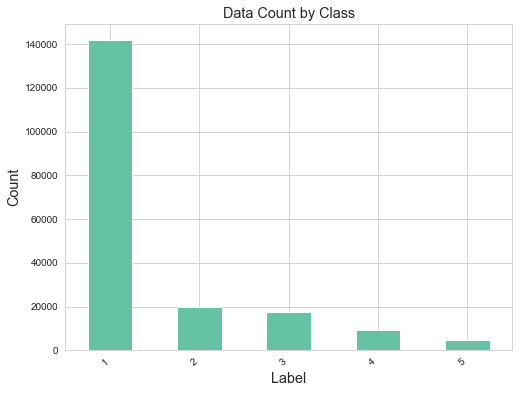

In [10]:
sns.set_style('whitegrid')
fig, ax = plt.subplots(1,1, figsize=(8,6))
_ = df_plot.plot(y='count', kind='bar', ax=ax, legend=False, colormap='Set2')
_ = ax.set_ylabel('Count', fontsize='x-large')
_ = ax.set_xlabel('Label', fontsize='x-large')
_ = ax.set_xticklabels(df_plot.priority.values, rotation=40, ha='right')
_ = ax.set_title('Data Count by Class', fontsize='x-large')

# TOPSIS Result

In [11]:
df_topsis = pd.read_csv('./resource/output_topsis.csv')

In [12]:
df_topsis = df_topsis[df_topsis.col!='priority']

In [13]:
df_topsis.shape

(83, 7)

In [14]:
df_topsis.head()

,col,typevalue,usenull,p_null,p_unique,p_max_row_class,rank_topsis
0,third_loc_id,1.0,1.0,0.033937,0.013533,0.031963,0.979647
1,second_loc_id,1.0,1.0,0.026155,0.003212,0.067071,0.966268
2,cost_center_id,1.0,1.0,0.025989,0.001264,0.068382,0.965746
3,asset_id,1.0,1.0,0.025901,0.051905,0.031693,0.959837
4,asset_group_id,1.0,1.0,0.025901,0.006580,0.089459,0.955425


In [15]:
list_exclude = ['cancel_user_id','origin_doc','prog_year_week_number','maint_order_cancel_reason_id',
                'total_cost','rpn','what','when','who','why','how','maint_order_on_hold_reason_id','performed_worktime',
                'estimated_worktime','performed_asset_downtime','id_mobile','mobile_uuid','rework_cos','index',
                'priority_calculated','maint_req_priority','maint_req_id',
                'user_text','scheduled_to_origin','est_finish_at','scheduled_to','est_finish_at_origin','logged_user_id']

df_exclude = df_table_full

for i in list_exclude:
    try:
        df_exclude = df_exclude.drop(i, axis=1)
    except:
        pass

In [16]:
df_topsis = df_topsis[df_topsis.col.isin(df_exclude.columns)]

In [17]:
df_topsis = df_topsis.reset_index().drop('index',axis=1)

In [18]:
# Select columns based in condition
df_select = df_topsis.query("p_null < 0.5 and p_unique < 0.5 and p_max_row_class < 0.8")

In [19]:
dict_cols = {
    "topsis5" : list(df_topsis[:5].col.values) ,
    "topsis10" : list(df_topsis[:10].col.values) ,
    "topsis15" : list(df_topsis[:15].col.values) ,
    "topsis20" : list(df_topsis[:20].col.values) ,
    "topsis25" : list(df_topsis[:25].col.values) ,
#     "manualcols" : list(df_select.col.values)
}

# Normalize Field Priority

In [20]:
# Use Table Normalized or Table Raw
# df_table = pd.concat(list_df)
df_table = df_table_full

In [21]:
print('Field Labels ', df_table[columnToClassify].unique())
print('Table Thape ',df_table.shape)

Field Labels  [1 3 5 2 4]
Table Thape  (193005, 84)


# Func Process Dataframe

In [43]:
"""
Options 
------
topsis5 topsis10 topsis15 topsis20 topsis25 manualcols
"""
def process_df_ml(df_raw, columnToClassify, cols_list):
    
    df_table = df_raw[[columnToClassify,*cols_list]]

    previsores = df_table.drop(columnToClassify, axis=1)
    classe = df_table[[columnToClassify]]

    previsores_names = list(df_table.drop(columnToClassify, axis=1).columns)
    class_names = df_table[columnToClassify].unique().astype(str)

    _,cols = previsores.shape

    # Features Transform

    from sklearn.preprocessing import LabelEncoder

    labelencoder_previsores = LabelEncoder()
    for i in previsores.columns:
        previsores[i] = labelencoder_previsores.fit_transform(previsores[i])

#     labelencoder_classe = LabelEncoder()
#     classe[columnToClassify] = labelencoder_classe.fit_transform(classe[columnToClassify])
    
    # Split Dataset
    from sklearn.model_selection import train_test_split

    X_train, X_test, y_train, y_test = train_test_split(previsores, classe, test_size=0.30, random_state=0)

    # Smote / Near Miss
    
#     from imblearn.over_sampling import SMOTE
#     smt = SMOTE()
#     X_train, y_train = smt.fit_sample(X_train, y_train)

    from imblearn.under_sampling import NearMiss

    nr = NearMiss()
    X_test, y_test = nr.fit_sample(X_test, y_test)
    X_train, y_train = nr.fit_sample(X_train, y_train)
    
    return X_train, X_test, y_train, y_test # , labelencoder_classe.classes_

In [44]:
# Func to ML Evaluate
def process_df_ml_test(df_raw, columnToClassify, cols_list):
    
    df_table = df_raw[[columnToClassify,*cols_list]]

    previsores = df_table.drop(columnToClassify, axis=1)
    classe = df_table[[columnToClassify]]

    previsores_names = list(df_table.drop(columnToClassify, axis=1).columns)
    class_names = df_table[columnToClassify].unique().astype(str)

    _,cols = previsores.shape

    # Features Transform

    from sklearn.preprocessing import LabelEncoder

    labelencoder_previsores = LabelEncoder()
    for i in previsores.columns:
        previsores[i] = labelencoder_previsores.fit_transform(previsores[i])

        
    #     from imblearn.under_sampling import NearMiss

#     nr = NearMiss()
#     X_train, y_train = nr.fit_sample(X_train, y_train)

#     labelencoder_classe = LabelEncoder()
#     classe[columnToClassify] = labelencoder_classe.fit_transform(classe[columnToClassify])
    
    return previsores, classe #, labelencoder_classe.classes_

# Test Varius Algorithms

In [45]:
#sklearn
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve

from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

from sklearn import ensemble, linear_model, neighbors, svm, tree, neural_network
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn import svm,model_selection, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process

#load package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [46]:
MLA = [
   
#     linear_model.LogisticRegressionCV(),
    tree.DecisionTreeClassifier(),
    naive_bayes.GaussianNB(),
#     neighbors.KNeighborsClassifier(),
    
    ensemble.RandomForestClassifier(),
#     svm.SVC(kernel='linear')
    ]

In [47]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns = MLA_columns)


BOLD = '\033[1m'
END = '\033[0m'

row_index = 0
for alg in MLA:
#     print("===================================================================================================")
#     print(BOLD+alg.__class__.__name__+END)
    for key in dict_cols.keys():
        print(BOLD+alg.__class__.__name__+END)
        print('\n DATASET: '+BOLD+key+END+'\n')
        try: 
            
            X_train, X_test, y_train, y_test = process_df_ml(df_table, columnToClassify, dict_cols[key])

            predicted_test = alg.fit(X_train, y_train).predict(X_test)

#             X_eval, y_eval = process_df_ml_test(df_eval, columnToClassify, dict_cols[key])

#             predicted_eval = alg.predict(X_eval)
        
#             print('\n ==> Classification Report in Test Data\n')
            class_report = classification_report(y_test, predicted_test)
            print(class_report)
            
#             print('\n ==> Classification Report in Evaluation Data \n')
#             class_report_eval = classification_report(y_eval, predicted_eval)
#             print(class_report_eval)
            
            
            MLA_name = alg.__class__.__name__
            MLA_compare.loc[row_index, 'Data_Mode'] = key
            MLA_compare.loc[row_index, 'MLA_Name'] = MLA_name
            MLA_compare.loc[row_index, 'MLA_Train_Accuracy'] = round(alg.score(X_train, y_train), 4)
            MLA_compare.loc[row_index, 'MLA_Test_Accuracy'] = round(accuracy_score(y_test, predicted_test), 4)
#             MLA_compare.loc[row_index, 'MLA_Eval_Accuracy'] = round(accuracy_score(y_eval, predicted_eval), 4)
            row_index+=1
            
        except:
            pass
    
MLA_compare.sort_values(by = ['MLA_Test_Accuracy'], ascending = False, inplace = True)    

DecisionTreeClassifier

 DATASET: topsis5

              precision    recall  f1-score   support

           1       0.28      0.23      0.25      1347
           2       0.35      0.24      0.28      1347
           3       0.38      0.42      0.40      1347
           4       0.28      0.47      0.35      1347
           5       0.54      0.35      0.43      1347

    accuracy                           0.34      6735
   macro avg       0.36      0.34      0.34      6735
weighted avg       0.36      0.34      0.34      6735

DecisionTreeClassifier

 DATASET: topsis10

              precision    recall  f1-score   support

           1       0.83      0.76      0.80      1347
           2       0.61      0.64      0.62      1347
           3       0.59      0.59      0.59      1347
           4       0.72      0.76      0.74      1347
           5       0.67      0.64      0.65      1347

    accuracy                           0.68      6735
   macro avg       0.68      0.68      0.68 

In [40]:
MLA_compare

,Data_Mode,MLA_Name,MLA_Train_Accuracy,MLA_Test_Accuracy
14,topsis25,RandomForestClassifier,0.9942,0.9138
13,topsis20,RandomForestClassifier,0.9934,0.9135
12,topsis15,RandomForestClassifier,0.9937,0.9129
2,topsis15,DecisionTreeClassifier,1.0000,0.8931
4,topsis25,DecisionTreeClassifier,1.0000,0.8920
3,topsis20,DecisionTreeClassifier,1.0000,0.8917
11,topsis10,RandomForestClassifier,0.9910,0.8894
1,topsis10,DecisionTreeClassifier,1.0000,0.8737
0,topsis5,DecisionTreeClassifier,0.8043,0.7867
10,topsis5,RandomForestClassifier,0.8033,0.7856


In [48]:
df2 = pd.pivot_table(MLA_compare, 
                     
                        values=['MLA_Test_Accuracy'], #,'MLA_Test_Accuracy','MLA_Eval_Accuracy'
                        index=['MLA_Name'],
                        columns=['Data_Mode'],
                        fill_value=0).reset_index()


In [49]:
df2

MLA_Name MLA_Test_Accuracy                    \
Data_Mode                                  topsis10 topsis15 topsis20   
0          DecisionTreeClassifier            0.6800   0.6649   0.6824   
1                      GaussianNB            0.3627   0.3405   0.3840   
2          RandomForestClassifier            0.6995   0.7207   0.7225   

                            
Data_Mode topsis25 topsis5  
0           0.6909  0.3440  
1           0.3584  0.2537  
2           0.7203  0.3471

# Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier
alg =RandomForestClassifier(n_estimators=10);

X_train, X_test, y_train, y_test = process_df_ml(df_table, columnToClassify, dict_cols["manualcols"])

predicted_test = alg.fit(X_train, y_train).predict(X_test)

In [ ]:
pd.DataFrame(y_train,columns=['priority']).groupby('priority').size()

In [ ]:
pd.DataFrame(y_test,columns=['priority']).groupby('priority').size()

In [ ]:
print('\n ==> Classification Report in Test Data\n')
class_report = classification_report(y_test, predicted_test,target_names=['1','2','3','4','5'])
print(class_report)

In [ ]:
# from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, classification_report
%config InlineBackend.figure_format ='retina'
sns.set_style("white")
# np.set_printoptions(precision=4)
# # Plot non-normalized confusion matrix

cm = confusion_matrix(y_test, predicted_test)

# # plot_confusion_matrix(y_test, predicted_test, classes=["1","3","5","2","4"],normalize=True,title='Confusion Matrix' )

In [ ]:
cm

In [ ]:
# plot_confusion_matrix(y_test.priority.values, predicted_test,classes=['1','3','5','2','4'],normalize=True)
plot_confusion_matrix(y_test, predicted_test,classes=['1','2','3','4','5'],normalize=True)

# Feature Importance

In [ ]:
from sklearn.ensemble import RandomForestClassifier
#Create a Gaussian Classifier

X_train, X_test, y_train, y_test = process_df_ml(df_table, columnToClassify, dict_cols["topsis20"])

rfc=RandomForestClassifier(n_estimators=10);
rfc.fit(y_train,X_train);

In [ ]:
rfc.feature_importances_

In [ ]:
feature_imp = pd.Series(rfc.feature_importances_,index=previsores_names).sort_values(ascending=False);

plt.rcParams['figure.figsize']=(10,10)
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

# Old

In [ ]:
def plot_confusion_matrix(cm,
                          target_names,
                          title='Confusion matrix',
                          cmap=None,
                          normalize=True):
    """
    given a sklearn confusion matrix (cm), make a nice plot

    Arguments
    ---------
    cm:           confusion matrix from sklearn.metrics.confusion_matrix

    target_names: given classification classes such as [0, 1, 2]
                  the class names, for example: ['high', 'medium', 'low']

    title:        the text to display at the top of the matrix

    cmap:         the gradient of the values displayed from matplotlib.pyplot.cm
                  see http://matplotlib.org/examples/color/colormaps_reference.html
                  plt.get_cmap('jet') or plt.cm.Blues

    normalize:    If False, plot the raw numbers
                  If True, plot the proportions

    Usage
    -----
    plot_confusion_matrix(cm           = cm,                  # confusion matrix created by
                                                              # sklearn.metrics.confusion_matrix
                          normalize    = True,                # show proportions
                          target_names = y_labels_vals,       # list of names of the classes
                          title        = best_estimator_name) # title of graph

    Citiation
    ---------
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

    """
    import matplotlib.pyplot as plt
    import numpy as np
    import itertools

    accuracy = np.trace(cm) / np.sum(cm).astype('float')
    misclass = 1 - accuracy

    if cmap is None:
        cmap = plt.get_cmap('Blues')

    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    if target_names is not None:
        tick_marks = np.arange(len(target_names))
        plt.xticks(tick_marks, target_names, rotation=45)
        plt.yticks(tick_marks, target_names)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    
    thresh = cm.max() / 1.5 if normalize else cm.max() / 2
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        if normalize:
            plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
        else:
            plt.text(j, i, "{:,}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")


    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
    plt.show()